<a href="https://colab.research.google.com/github/SonHyeok/toilet/blob/main/%EA%B3%B5%EC%A4%91%ED%99%94%EC%9E%A5%EC%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전국 공중 화장실 분포 데이터


# 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

## 한글 폰트 설정

In [2]:
#한글폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#한글폰트 설정
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# 2.데이터 불러오기, 데이터 정제

In [3]:
df = pd.read_csv('/content/drive/MyDrive/개인 공공데이터 분석 자료/data/전국공중화장실표준데이터.csv', encoding = 'cp949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,17,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35674 entries, 0 to 35673
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   구분             35674 non-null  object 
 1   화장실명           35674 non-null  object 
 2   소재지도로명주소       28455 non-null  object 
 3   소재지지번주소        27754 non-null  object 
 4   남녀공용화장실여부      35674 non-null  object 
 5   남성용-대변기수       35674 non-null  int64  
 6   남성용-소변기수       35674 non-null  int64  
 7   남성용-장애인용대변기수   35674 non-null  int64  
 8   남성용-장애인용소변기수   35674 non-null  int64  
 9   남성용-어린이용대변기수   35674 non-null  object 
 10  남성용-어린이용소변기수   35674 non-null  object 
 11  여성용-대변기수       35674 non-null  int64  
 12  여성용-장애인용대변기수   35674 non-null  int64  
 13  여성용-어린이용대변기수   35674 non-null  int64  
 14  관리기관명          35674 non-null  object 
 15  전화번호           27137 non-null  object 
 16  개방시간           35674 non-null  object 
 17  설치년도           13935 non-null  object 
 18  위도    

In [5]:
df.head(5)

,구분,화장실명,소재지도로명주소,소재지지번주소,남녀공용화장실여부,남성용-대변기수,남성용-소변기수,남성용-장애인용대변기수,남성용-장애인용소변기수,남성용-어린이용대변기수,남성용-어린이용소변기수,여성용-대변기수,여성용-장애인용대변기수,여성용-어린이용대변기수,관리기관명,전화번호,개방시간,설치년도,위도,경도,화장실소유구분,화장실설치장소유형,오물처리방식,비상벨설치유형,화장실입구CCTV설치유무,기저귀교환대장소,리모델링년월,데이터기준일자,제공기관코드,제공기관명
0,공중화장실,묘산주유소,경상남도 합천군 묘산면 영서로 1748,NaN,N,2,2,0,0,0,0,2,0,0,묘산주유소,NaN,(평일)09:00~18:00+(주말)09:00~18:00+(공휴일)09:00~18:00,2095,35.643237,128.084587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-21,5480000,경상남도 합천군
1,공중화장실,묘산분소,경상남도 합천군 묘산면 묘산로 167-1,NaN,Y,1,0,0,0,0,0,1,0,0,합천경찰서(묘산분소),NaN,(평일)09:00~18:00+(주말)09:00~18:00+(공휴일)09:00~18:00,2096,35.658146,128.112700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-21,5480000,경상남도 합천군
2,공중화장실,묘산면사무소,경상남도 합천군 묘산면 묘산로 173-1,NaN,N,1,1,1,1,0,0,2,1,0,합천군(묘산면),NaN,(평일)09:00~18:00+(주말)09:00~18:00+(공휴일)09:00~18:00,2088,35.658440,128.113314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-21,5480000,경상남도 합천군
3,공중화장실,행신2동주민센터 화장실,"경기도 고양시 덕양구 충경로 30 (행신동, 행신2동주민센터)",NaN,N,0,0,0,0,0,0,0,0,0,경기도 고양시 덕양구청,NaN,09:00~18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02,3940000,경기도 고양시
4,공중화장실,원일주유소,경기도 고양시 일산동구 고양대로 1071 (식사동),경기도 고양시 일산동구 식사동 596-13,N,1,2,0,0,0,0,1,0,0,경기도 고양시 일산동구청,NaN,09:00~18:00,NaN,37.669669,126.810136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02,3940000,경기도 고양시


In [6]:
df.tail(5)

,구분,화장실명,소재지도로명주소,소재지지번주소,남녀공용화장실여부,남성용-대변기수,남성용-소변기수,남성용-장애인용대변기수,남성용-장애인용소변기수,남성용-어린이용대변기수,남성용-어린이용소변기수,여성용-대변기수,여성용-장애인용대변기수,여성용-어린이용대변기수,관리기관명,전화번호,개방시간,설치년도,위도,경도,화장실소유구분,화장실설치장소유형,오물처리방식,비상벨설치유형,화장실입구CCTV설치유무,기저귀교환대장소,리모델링년월,데이터기준일자,제공기관코드,제공기관명
35669,공중화장실,삼희빌딩,대구광역시 중구 달구벌대로 2156,대구광역시 중구 봉산동 165-7,N,20,30,1,0,0,0,27,1,0,개인,NaN,06:00~21:30,NaN,35.863682,128.598878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-26,6270000,대구광역시
35670,공중화장실,상도빌딩,대구광역시 중구 태평로 204,대구광역시 중구 태평로1가 21-5,Y,11,5,0,0,0,0,0,0,0,개인,NaN,09:00~18:00,NaN,35.873799,128.599857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-26,6270000,대구광역시
35671,공중화장실,서남빌딩,대구광역시 중구 국채보상로 458,대구광역시 중구 대신동 115-5,N,0,1,1,0,0,0,0,1,0,개인,NaN,"08:00~19:00/첫째,셋째 일요일 휴무",NaN,35.870269,128.580906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-26,6270000,대구광역시
35672,개방화장실,서문로119안전센터,대구광역시 중구 경상감영길 45,대구광역시 중구 서문로1가 1-6,Y,1,2,1,0,0,0,0,0,0,서문로119안전센터,NaN,24시간,NaN,35.871576,128.589985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-26,6270000,대구광역시
35673,개방화장실,서문시장 1지구,대구광역시 중구 큰장로28길 10,대구광역시 중구 대신동 115-379,N,3,4,0,0,0,0,6,0,0,서문시장1지구 1층상인회,NaN,09:00~18:30/휴무일 제외,NaN,35.869393,128.579824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-26,6270000,대구광역시


## 데이터 결측치 확인

In [7]:
df.isnull().sum()

구분                   0
화장실명                 0
소재지도로명주소          7219
소재지지번주소           7920
남녀공용화장실여부            0
남성용-대변기수             0
남성용-소변기수             0
남성용-장애인용대변기수         0
남성용-장애인용소변기수         0
남성용-어린이용대변기수         0
남성용-어린이용소변기수         0
여성용-대변기수             0
여성용-장애인용대변기수         0
여성용-어린이용대변기수         0
관리기관명                0
전화번호              8537
개방시간                 0
설치년도             21739
위도                7534
경도                7532
화장실소유구분          35674
화장실설치장소유형        35674
오물처리방식           35674
비상벨설치유형          35674
화장실입구CCTV설치유무    35674
기저귀교환대장소         35674
리모델링년월           35674
데이터기준일자              0
제공기관코드               0
제공기관명                0
dtype: int64

## 필요한 데이터 컬럼의 결측치 채우고 수정

In [8]:
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])
#도로명 주소를 통해 위도 경도를 구하기 위해 지번주소로 도로명주소의 결측치를 채웠습니다.

In [9]:
df['소재지도로명주소'].isnull().sum()
#결측치 채워졌는지 확인

0

## 남녀 공용 화장실 여부 확인


In [14]:
df['남녀공용화장실여부'].value_counts()

N    30390
Y     4997
n      206
y       81
Name: 남녀공용화장실여부, dtype: int64

In [15]:
df['남녀공용화장실여부'] = df['남녀공용화장실여부'].replace('n','N')
df['남녀공용화장실여부'] = df['남녀공용화장실여부'].replace('y','Y')

In [16]:
df['남녀공용화장실여부'].value_counts()

N    30596
Y     5078
Name: 남녀공용화장실여부, dtype: int64

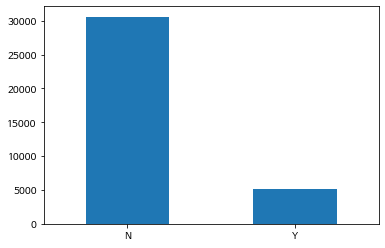

In [17]:
df['남녀공용화장실여부'].value_counts().plot.bar(rot = 0)

## 화장실 구분 확인

In [18]:
df['구분'].value_counts()

공중화장실    25828
개방화장실     7518
간이화장실     1687
이동화장실      641
Name: 구분, dtype: int64

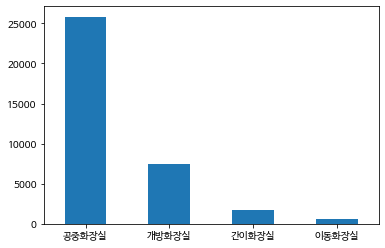

In [19]:
df['구분'].value_counts().plot.bar( rot = 0)

## 남자 화장실 소변, 대변기수 확인


In [20]:
df_man = df[['남성용-대변기수',	'남성용-소변기수',	'남성용-장애인용대변기수',	'남성용-장애인용소변기수',	'남성용-어린이용대변기수',	'남성용-어린이용소변기수']]

In [21]:
df_man['남성용-어린이용대변기수'] = df_man['남성용-어린이용대변기수'].apply(pd.to_numeric, errors = 'coerce')
df_man['남성용-어린이용소변기수'] = df_man['남성용-어린이용소변기수'].apply(pd.to_numeric, errors = 'coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df_man.sum().astype(int)

남성용-대변기수        150745
남성용-소변기수        199810
남성용-장애인용대변기수     17235
남성용-장애인용소변기수      9203
남성용-어린이용대변기수      2736
남성용-어린이용소변기수      2348
dtype: int64

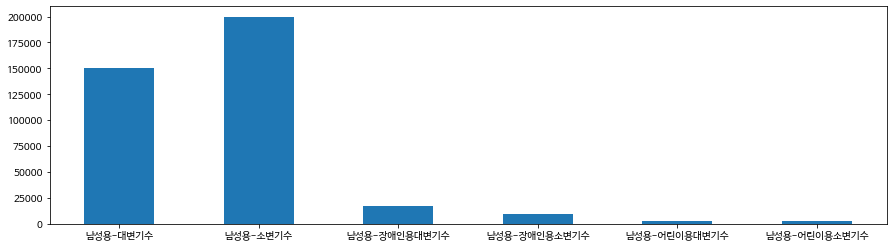

In [23]:
df_man.sum().astype(int).plot.bar(figsize = (15,4), rot = 0)

## 여자 화장실 대변기수 확인

In [24]:
df_woman = df[['여성용-대변기수',	'여성용-장애인용대변기수',	'여성용-어린이용대변기수']]

In [25]:
df_woman.sum()

여성용-대변기수        219860
여성용-장애인용대변기수     15560
여성용-어린이용대변기수      3947
dtype: int64

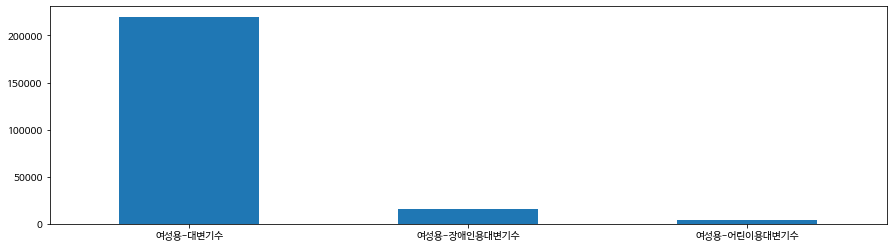

In [26]:
df_woman.sum().plot.bar(figsize = (15,4), rot = 0)

In [27]:
# df['개방시간'].value_counts()

In [28]:
# df['개방시간'] = df['개방시간'].replace("-","제공 되지 않음").replace(":~:","제공 되지 않음").replace("데이터없음","제공 되지 않음")
# df['개방시간'] = df['개방시간'].replace("24","24시간")
# df['개방시간'] = df['개방시간'].replace("00:00~24:00","24시간")
# df['개방시간'] = df['개방시간'].replace("(09:00~18:00)","09:00~18:00")
# df['개방시간'] = df['개방시간'].replace("상시","24시간")
# df['개방시간'] = df['개방시간'].replace("(평일)09:00~18:00+(주말)09:00~18:00+(공휴일)09:00~18:00","09:00~18:00")

In [29]:
# pd.set_option('display.max_row', 590)
# df['개방시간'].value_counts()

## 사용할 컬럼으로 데이터 프레임 재구성

In [30]:
columns = ['구분' , '화장실명' , '남녀공용화장실여부' , '개방시간' , '관리기관명' , '위도' , '경도']

In [31]:
# df = df[columns].copy()

In [32]:
# df